<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Ciencia de datos y Analítica de negocios</center></font></h1>
<h1><center>Clasificación de aprendizaje supervisado: Árbol de decisión - Semana 2</center></h1>

<center><img src="https://img.freepik.com/free-photo/axis-cnc-mills-machines-design-configuration-that-utilizes-swivel-head-machine-table-flush-with-surface-metalworking-industrial_67340-733.jpg?w=996" width="800" height="500"></center>

<b><h2><center>Predicción de fallas de una máquina</center></h2></b>

## Planteamiento del problema

###Contexto empresarial
Los fallos del sistema son un problema común en la industria manufacturera, donde se utilizan diversas máquinas y equipos. En la mayoría de los casos, es importante poder predecir los fallos de las máquinas mediante el análisis de los datos del sistema y la adopción de medidas preventivas para poder atajarlos. Esto se conoce como mantenimiento predictivo y, con el aumento de la disponibilidad de datos y recursos informáticos, el uso de estos métodos de mantenimiento proactivo basados en datos ha dado lugar a varias ventajas, como la minimización del tiempo de inactividad de los equipos, la minimización de los costes asociados a los repuestos y suministros, etc.
AutoMobi Engineering Pvt. Ltd es una empresa de fabricación de componentes para automóviles. Las instalaciones de fabricación de AutoMobi constan de numerosos productos mecanizados en varias máquinas CNC (control numérico por computadora. En un intento de pasar a un proceso de mantenimiento basado en datos, la empresa ha instalado sensores en varios lugares para recoger datos sobre los distintos parámetros que intervienen en el proceso de fabricación. Inicialmente, quieren probarlo en un taller de fabricación de boquillas de inyectores, en el que se fabrican boquillas de inyectores de combustible para motores de automóviles mediante diversos procesos de fabricación (como el torneado, el taladrado, etc.). La empresa ha estado recopilando datos cada hora de estos sensores y pretende crear soluciones basadas en ML utilizando los datos para optimizar los costos, mejorar la previsibilidad de los fallos y minimizar el tiempo de inactividad de los equipos.

###Objetivo
Recientemente, AutoMobi se ha encontrado con un problema de fallos frecuentes del equipo en la unidad de fabricación de boquillas de inyectores de combustible, lo que ha provocado perturbaciones en el proceso de fabricación. Se han puesto en contacto con el equipo de Ciencia de Datos para buscar una solución y han compartido los datos de los últimos tres meses. Como miembro del equipo de Ciencia de Datos, se le encarga el análisis de los datos y el desarrollo de un modelo de Aprendizaje Automático para detectar posibles fallos de la máquina, determinar los factores que más influyen en su estado y proporcionar recomendaciones para la optimización de costos a la dirección.

**Diccionario de datos**
* UDI: Identificador único que va de 1 a 10000
* Type: El tipo de producto consiste en una calidad baja (60% de todos los productos), media (30%) y alta (10%) que corresponde a L, M y H
* Air temperature: Temperatura ambiente (en el taller mecánico) medida en Kelvin
* Process Temperature: Temperatura de la punta de la herramienta medida en Kelvin
* Rotational Speed: Velocidad de rotación del husillo de la máquina medida en revoluciones por minuto (rpm)
* Torque: Torque que actúa sobre el cabezal de la máquina medida en Newton metro (Nm)
* Tool wear: Desgaste de la herramienta medido en micrómetros (Durante el proceso de fabricación, el continuo roce de la herramienta con la pieza provoca el desgaste del material de la herramienta. El desgaste de la herramienta se mide como la cantidad de desgaste en la cara de corte de la herramienta medida en micrómetros)
* Failure: 0-Sin fallo, 1-Fallo

## Importando las bibliotecas necesarias

In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Cargando el conjunto de datos

In [ ]:
df_main = pd.read_csv("Predictive_Maintenance_Case_Study.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Resumen del conjunto de datos

### Ver la primera y la última 5 filas del conjunto de datos.

In [ ]:
data.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.10000,323.74074,1551,42.80000,0,0
1,2,L,298.20000,324.11111,1408,46.30000,3,0
2,3,L,298.10000,323.37037,1498,49.40000,5,0
3,4,L,298.20000,323.74074,1433,39.50000,7,0
4,5,L,298.20000,324.11111,1408,40.00000,9,0


In [ ]:
data.tail()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
9995,9996,M,298.80000,323.00000,1604,29.50000,14,0
9996,9997,H,298.90000,323.00000,1632,31.80000,17,0
9997,9998,M,299.00000,323.74074,1645,33.40000,22,0
9998,9999,H,299.00000,324.11111,1408,48.50000,25,0
9999,10000,M,299.00000,324.11111,1500,40.20000,30,0


* Hay tres tipos de productos: L, M y H (calidad baja, media y alta).
* La columna `UDI` contiene valores únicos.

### Comprender la forma del conjunto de datos.

In [ ]:
data.shape

(10000, 8)

* El conjunto de datos tiene 10000 filas y 8 columnas.

### Verifique los tipos de datos de las columnas para el conjunto de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


* La columna `Tipo` es de tipo *objeto* mientras que el resto de las columnas son de naturaleza numérica

### Comprobación de valores faltantes

In [ ]:
# checking for null values
data.isnull().sum()

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

* No hay valores nulos en el conjunto de datos

### Eliminando los valores duplicados

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

* No hay valores duplicados en los datos.

#### Eliminando las columnas con todos los valores únicos

In [ ]:
data.UDI.nunique()

10000

* La columna `UDI` contiene solo valores únicos, por lo que podemos descartarla

In [ ]:
data = data.drop(["UDI"], axis=1)

### Resumen estadístico de los datos

**Veamos el resumen estadístico de los datos.**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.00000,300.00493,2.00026,295.30000,298.30000,300.10000,301.50000,304.50000
Process temperature,10000.00000,328.94652,5.49531,313.00000,324.48148,329.29630,333.00000,343.00000
Rotational speed,10000.00000,1538.77610,179.28410,1168.00000,1423.00000,1503.00000,1612.00000,2886.00000
Torque,10000.00000,39.98691,9.96893,3.80000,33.20000,40.10000,46.80000,76.60000
Tool wear,10000.00000,107.95100,63.65415,0.00000,53.00000,108.00000,162.00000,253.00000
Failure,10000.00000,0.03390,0.18098,0.00000,0.00000,0.00000,0.00000,1.00000


* La *temperatura del aire* oscila entre 300K y 304,5K. Por lo general, los talleres mecánicos se mantienen en un entorno de controlado, por lo que el rango de temperatura parece normal.
* La *temperatura del proceso* es un poco más alta que la *temperatura del aire* y eso es bastante habitual porque el calor se genera continuamente durante el proceso de mecanizado.
* La *velocidad de rotación* tiene un valor máximo de 2886 rpm mientras que 1612 rpm en el percentil 75. Algunos de los procesos se realizan a una velocidad superior a la habitual.

## <a name='link2'>Resumen del análisis exploratorio de datos (EDA)</a>

### **Nota**: La sección EDA se ha cubierto varias veces en los estudios de casos anteriores. En este estudio de caso, nos centraremos principalmente en los aspectos de construcción del modelo. Solo veremos las observaciones clave de EDA. La EDA detallada se puede encontrar en la sección <a href = #link1>apéndice</a>.

**Las siguientes funciones deben definirse para llevar a cabo el EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Análisis univariado

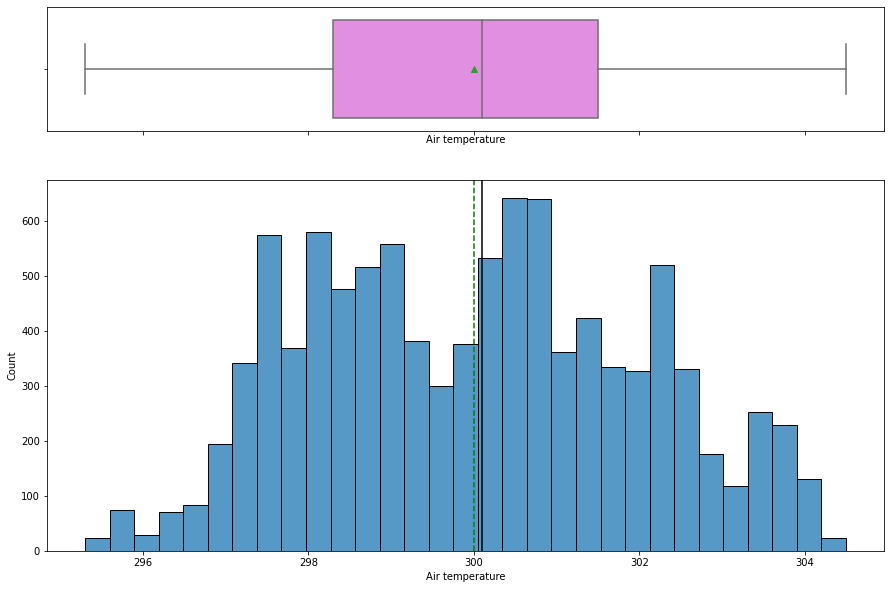

In [ ]:
histogram_boxplot(data, "Air temperature")

* La distribución de ```Air temperature```  parece ligeramente sesgada a la izquierda con una temperatura media de alrededor de 300K.
* No hay ningún valor atípico presente.

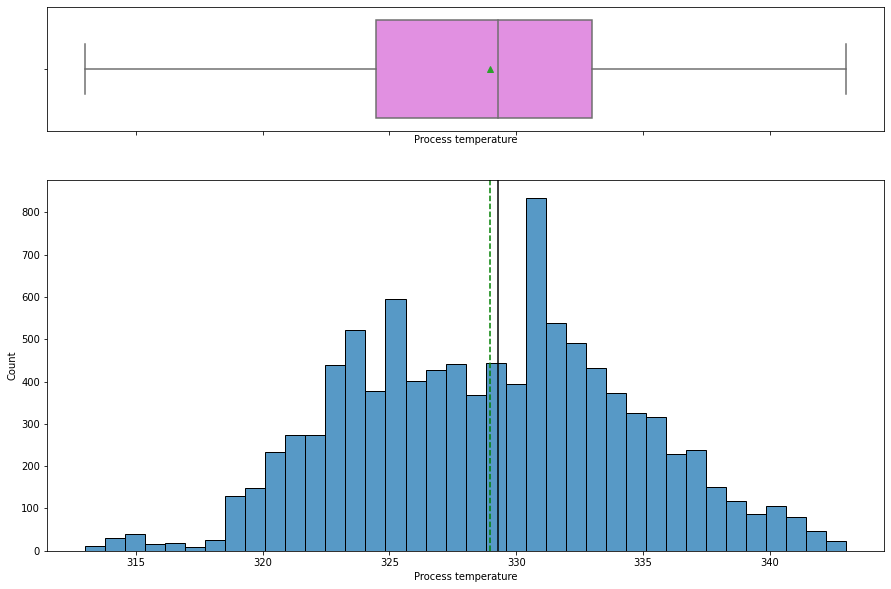

In [ ]:
histogram_boxplot(data, "Process temperature")

* La distribución de ```Process temperature``` parece ligeramente sesgada hacia la izquierda con una temperatura media de alrededor de 329K.
* No hay ningún valor atípico presente.

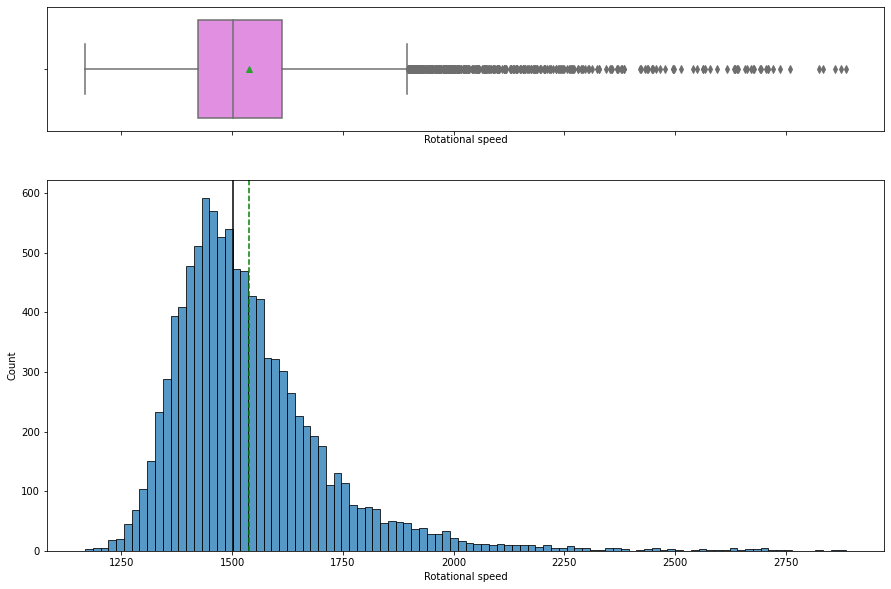

In [ ]:
histogram_boxplot(data, "Rotational speed")

* El valor de `Rotational speed` está sesgada a la derecha con muchos valores atípicos en el cuartil superior.
* Algunas de las operaciones de fabricación se realizan a mayor velocidad.

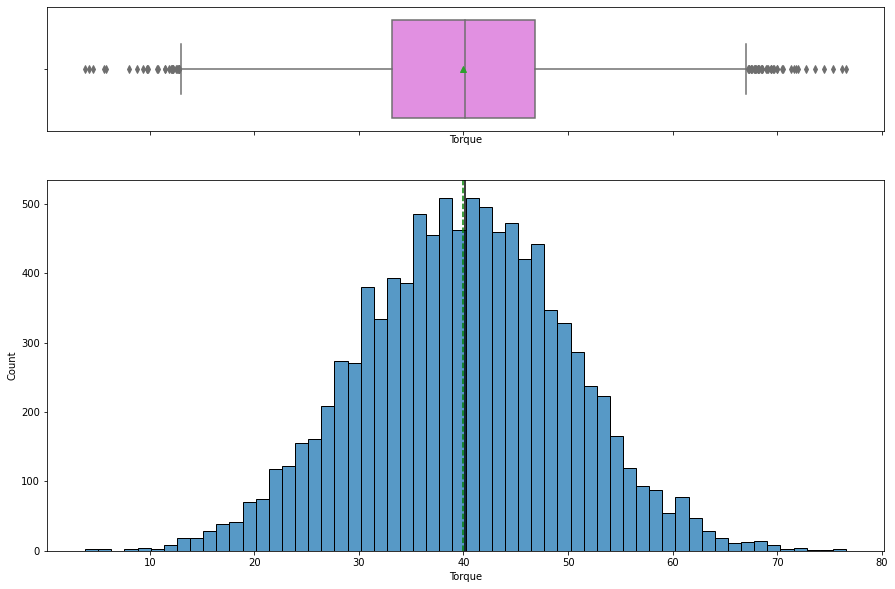

In [ ]:
histogram_boxplot(data, "Torque")

* La distribución `Torque` es normal con un valor medio de alrededor de 40 Nm.
* Los valores atípicos están presentes en ambos lados.

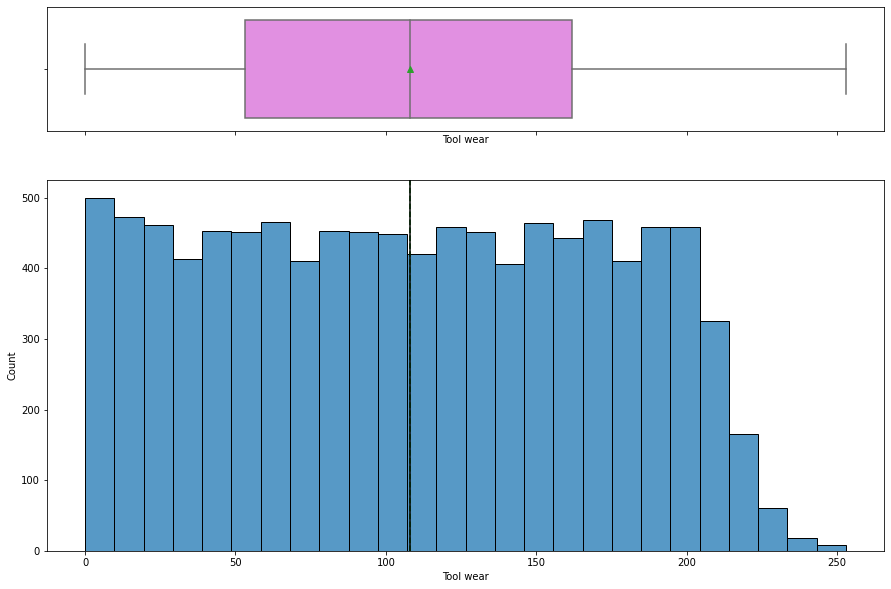

In [ ]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` se distribuye uniformemente y algunos de los valores más altos son menos frecuentes.




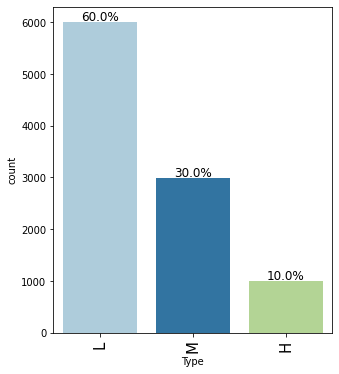

In [ ]:
labeled_barplot(data, "Type", perc=True)

* Alrededor del 60 % de los productos son de baja calidad, el 30 % son de calidad media y el 10 % son de alta calidad.

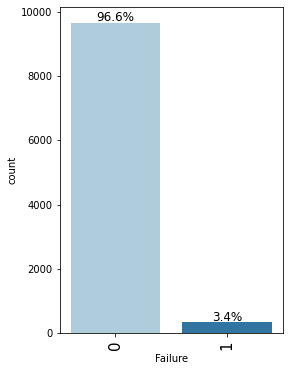

In [ ]:
labeled_barplot(data, "Failure", perc=True)

* En el 96,6% de las observaciones la máquina no falla mientras que en el 3,4% de las observaciones falla.

### Análisis bivariado

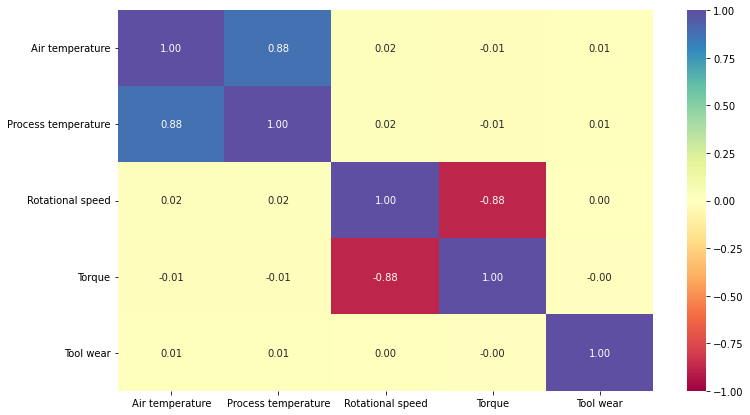

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Existe una correlación positiva entre la `Air temperature` y `Process Temperature`.
* Existe una correlación negativa entre la `Rotational speed` y el `Torque`.
* No hay otras variables correlacionadas. Lo analizaremos más a fondo.

**Veamos cómo varía la variable objetivo según el tipo de producto**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


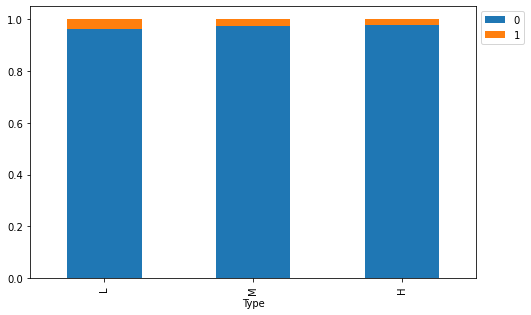

In [ ]:
stacked_barplot(data, "Type", "Failure")

* Alrededor del 70 % de las fallas ocurrieron durante el mecanizado de tipo L, es decir, productos de baja calidad.
* El mecanizado de productos de alta calidad es menos propenso a fallar.

**Analicemos la relación entre `Process temperature` y `Failure`.**

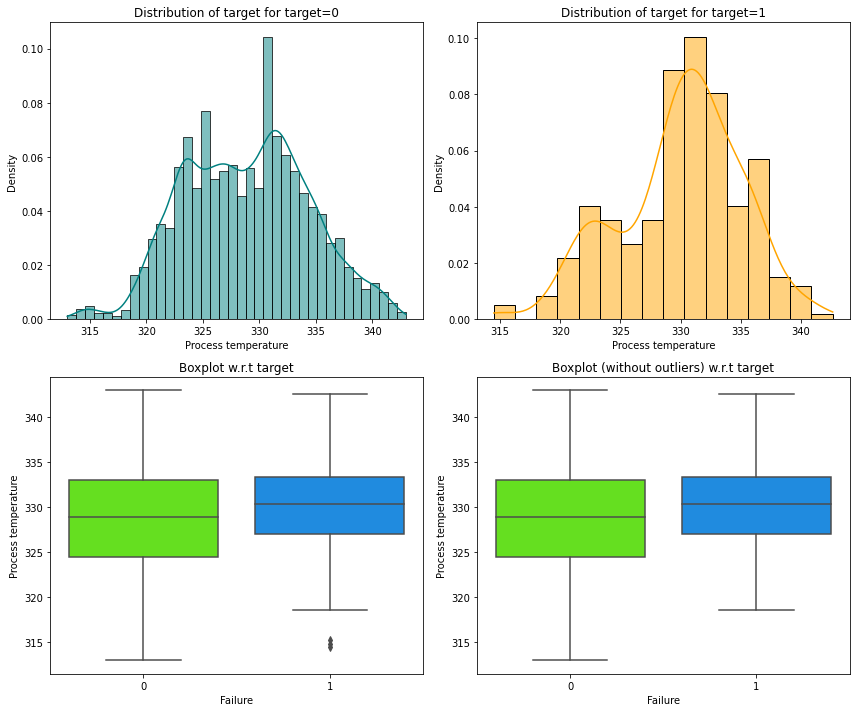

In [ ]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* La mayoría de las fallas del sistema de fabricación ocurren a una *temperatura de proceso* más alta.

**Analicemos la relación entre `Rotational speed` y `Failure`.**

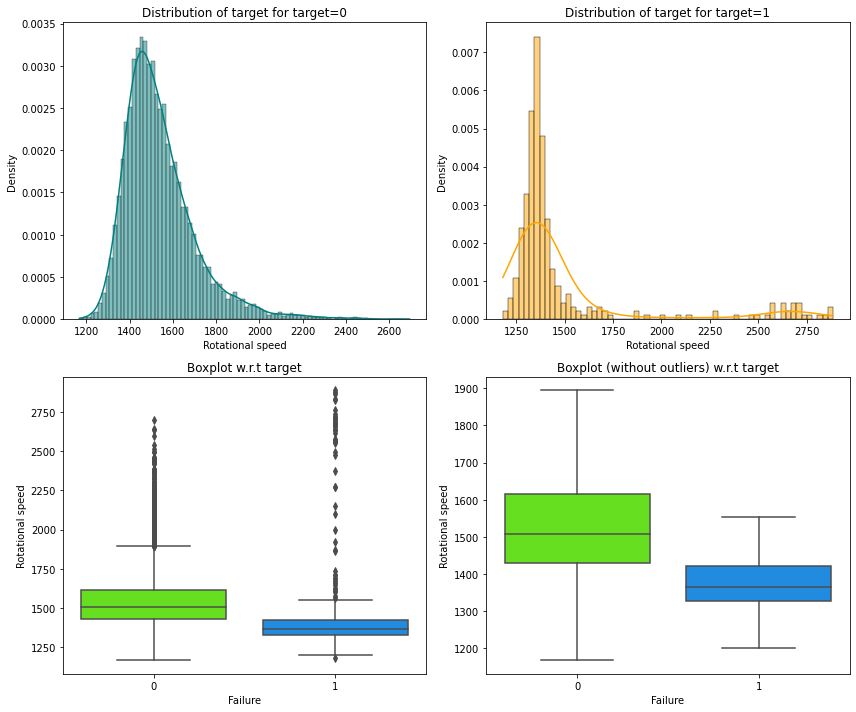

In [ ]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* Hay un límite claro que muestra la separación del estado de falla en función de los valores de `Rotation speed`.
* El sistema de fabricación es más propenso a fallar a una *velocidad de rotación* más baja que a una *velocidad de rotación* más alta.

## Preprocesamiento de datos

### Detección de valores atípicos

**Veamos si hay valores atípicos en los datos.**

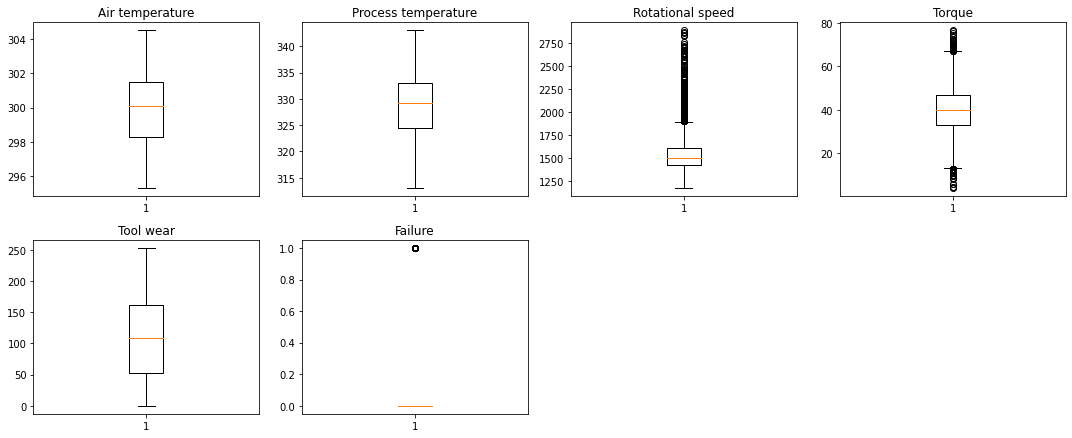

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observaciones

* Hay bastantes valores atípicos en los datos.
* Sin embargo, no los trataremos como si fueran valores propios.

### Preparación de datos para el modelado

In [ ]:
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7000, 7)
Shape of test set :  (3000, 7)
Percentage of classes in training set:
0   0.96629
1   0.03371
Name: Failure, dtype: float64
Percentage of classes in test set:
0   0.96567
1   0.03433
Name: Failure, dtype: float64


* Habíamos visto que alrededor del 96,6 % de las observaciones pertenecen a la clase 0 (No fallaron) y el 3,37 % de las observaciones pertenecen a la clase 1 (Fallaron), y esto se conserva en los conjuntos de prueba y tren.

## Construcción del modelo

### Árbol de decisiones (predeterminado)

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Evaluación del modelo

**Criterio de evaluación del modelo**

**El modelo puede hacer predicciones incorrectas como:**
- Predecir que una máquina no fallará pero en realidad, la máquina fallará (FN)
- Predecir que una máquina fallará pero en realidad, la máquina no fallará (FP)

**¿Qué caso es más importante?**

- Si predecimos que una máquina no fallará pero en realidad la máquina falla, entonces la empresa tendrá que asumir el costo de reparación/reemplazo y también enfrentar pérdidas por tiempo de inactividad del equipo.
- Si predecimos que una máquina fallará pero en realidad la máquina no falla, entonces la empresa tendrá que asumir el costo de la inspección.
- El costo de inspección es generalmente menor en comparación con el costo de reparación/reemplazo

**¿Cómo reducir las pérdidas?**

La empresa querría maximizar la recuperación, cuanto mayor sea la puntuación de recuperación, mayores serán las posibilidades de minimizar los falsos negativos.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

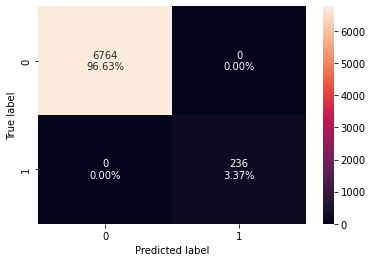

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


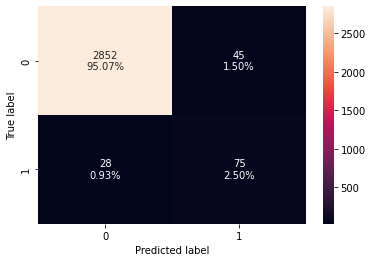

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.97567,0.72816,0.62500,0.67265


### Árbol de decisión (con class_weights)

* Si la frecuencia de la clase A es del 10 % y la frecuencia de la clase B es del 90 %, entonces la clase B se convertirá en la clase dominante y el árbol de decisión se inclinará hacia las clases dominantes.
* En este caso, estableceremos class_weight = "balanced", que ajustará automáticamente los pesos para que sean inversamente proporcionales a las frecuencias de clase en los datos de entrada

* class_weight es un hiperparámetro para el clasificador del árbol de decisión

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

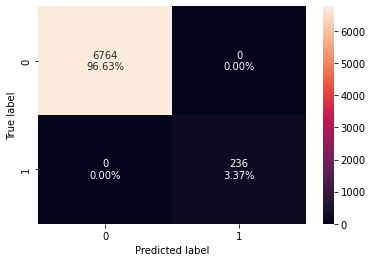

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* El modelo puede clasificar perfectamente todos los puntos de datos en el conjunto de entrenamiento.
* 0 errores en el conjunto de entrenamiento, cada muestra ha sido clasificada correctamente.
* Como sabemos, un árbol de decisión seguirá creciendo y clasificará cada punto de datos correctamente si no se aplican restricciones, ya que los árboles aprenderán todos los patrones del conjunto de entrenamiento.
* Esto generalmente conduce a un ajuste excesivo del modelo, ya que Decision Tree funcionará bien en el conjunto de entrenamiento, pero no podrá replicar el rendimiento en el conjunto de prueba.

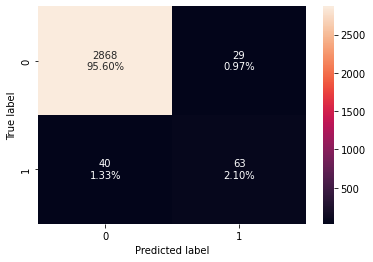

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97700,0.61165,0.68478,0.64615


* Hay una gran disparidad en el rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de prueba, lo que sugiere que el modelo se está sobreajustando.

**Utilicemos técnicas de poda para tratar de reducir el sobreajuste.**

### Árbol de decisión (pre-poda)

**Uso de GridSearch para el ajuste de hiperparámetros de nuestro modelo de árbol**

* El ajuste de hiperparámetros también es complicado en el sentido de que no existe una forma directa de calcular cómo un cambio en el valor del hiperparámetro reducirá la pérdida de su modelo, por lo que generalmente recurrimos a la experimentación, es decir, usaremos la búsqueda en cuadrícula.
* La búsqueda en cuadrícula es una técnica de ajuste que intenta calcular los valores óptimos de los hiperparámetros.
* Es una búsqueda exhaustiva que se realiza sobre los valores de los parámetros específicos de un modelo.
* Los parámetros del estimador/modelo utilizados para aplicar estos métodos se optimizan mediante una búsqueda de cuadrícula con validación cruzada sobre una cuadrícula de parámetros.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

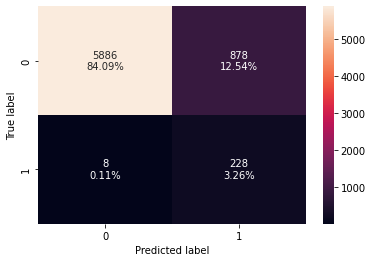

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.87343,0.96610,0.20615,0.33979


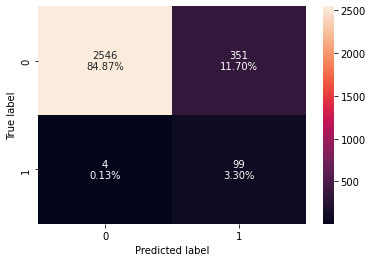

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.88167,0.96117,0.22000,0.35805


* El modelo está dando un resultado generalizado ahora, ya que los puntajes de recuperación tanto en el tren como en los datos de prueba están llegando a alrededor de 0.96, lo que muestra que el modelo puede generalizar bien en datos no vistos.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

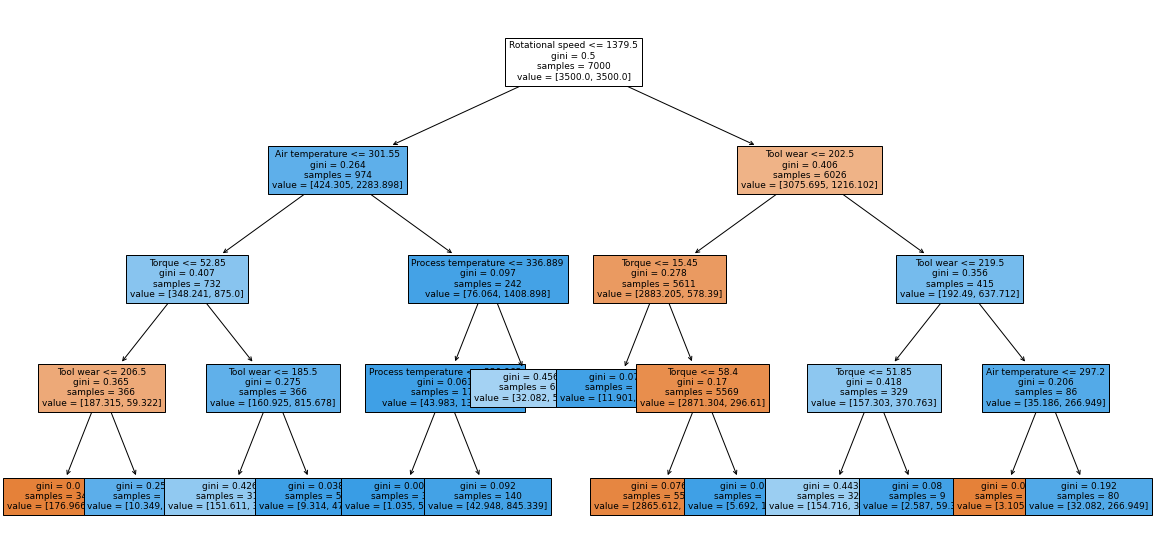

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- weights: [151.61, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- Process temperature <= 336.89
|   |   |   |--- Process temperature <= 330.96
|   |   |   |   |--- weights: [1.03, 504.24] class: 1
|   |   |   |--- Process temperature >  330.96
|   |   |   |   |--- weights: [42.95, 845.34] class: 1
|   |   |--- Process temperature >  336.89
|   |   |   |--- weights: [32.08, 59.32] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 202.50
|   |   |--- Torque <= 15.45
|   |   |   |--- weights: [11.90, 281.78] c

**Observaciones del árbol prepodado:**

Usando las reglas de decisión extraídas anteriormente, podemos hacer interpretaciones del modelo de árbol de decisión como:

* Si la velocidad de rotación es inferior o igual a 1379,50, la temperatura del aire es inferior o igual a 301,55, la torsión es inferior o igual a 52,85 y el desgaste de la herramienta es superior a 206,50, entonces es más probable que la máquina falle

**Las interpretaciones de otras reglas de decisión se pueden hacer de manera similar**

In [ ]:
importances = estimator.feature_importances_
importances

array([0.03002803, 0.00726903, 0.40080865, 0.32726572, 0.23462857,
       0.        , 0.        ])

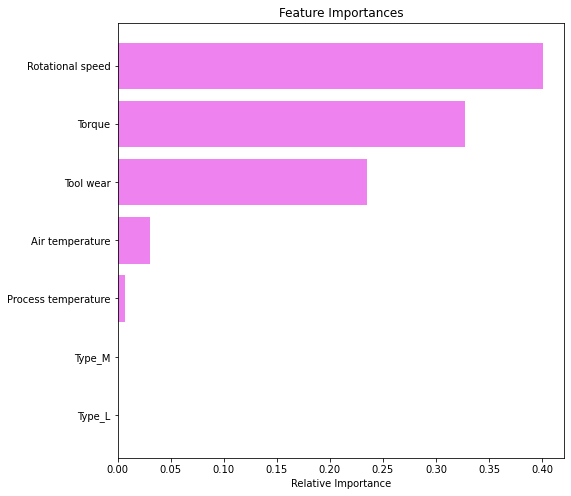

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* En el árbol de decisión preajustado también, la velocidad de rotación y la torsión son las características más importantes.

### Árbol de decisiones (Poda posterior)

El `DecisionTreeClassifier` proporciona parámetros como
``min_samples_leaf`` y ``max_depth`` para evitar que un árbol se sobreajuste. La poda de complejidad de costos ofrece otra opción para controlar el tamaño de un árbol. En `DecisionTreeClassifier`, esta técnica de poda está parametrizada por el
parámetro de complejidad de costos, ``ccp_alpha``. Mayores valores de ``ccp_alpha``
aumentar el número de nodos podados. Aquí sólo mostramos el efecto de
``ccp_alpha`` sobre la regularización de los árboles y cómo elegir un ``ccp_alpha``
basado en puntuaciones de validación.



**Impureza total de hojas vs alfas efectivos de árbol podado**

La poda de complejidad de costo mínimo encuentra recursivamente el nodo con el "más débil
enlace ". El enlace más débil se caracteriza por un alfa efectivo, donde los nodos con el alfa efectivo más pequeño se eliminan primero. Para tener una idea de
qué valores de ``ccp_alpha`` podrían ser apropiados, scikit-learn proporciona
`DecisionTreeClassifier.cost_complexity_pruning_path` que devuelve
alfas efectivos y las correspondientes impurezas totales de la hoja en cada paso de el proceso de poda. A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que
aumenta la impureza total de sus hojas.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


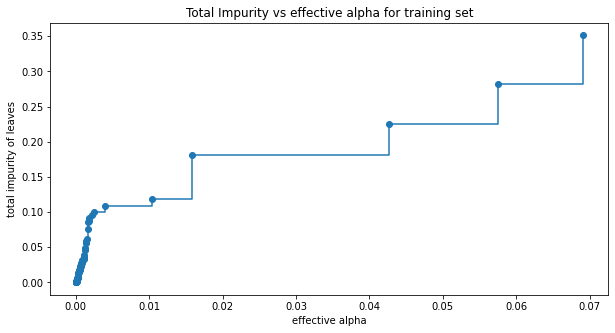

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

A continuación, entrenamos un árbol de decisión usando los alfas efectivos. el ultimo valor
en ``ccp_alphas`` es el valor alfa que poda todo el árbol,
dejando el árbol, ``clfs[-1]``, con un nodo.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14875976077076158


Para el resto, eliminamos el último elemento en
``clfs`` y ``ccp_alphas``, porque es el árbol trivial con un solo
nodo. Aquí mostramos que el número de nodos y la profundidad del árbol disminuyen a medida que alfa
aumenta

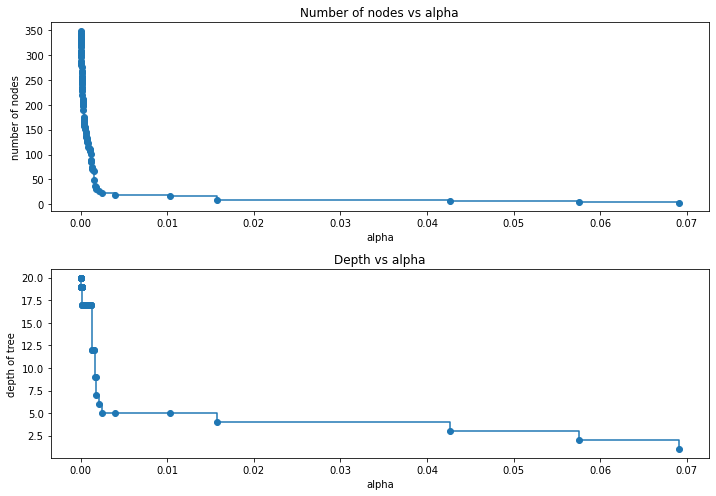

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

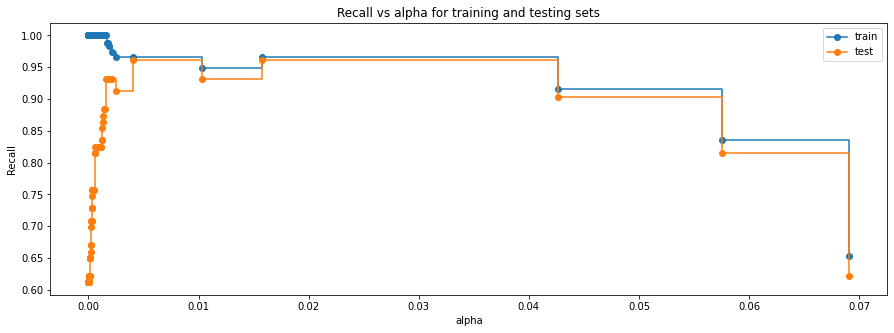

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004008680486241742, class_weight='balanced',
                       random_state=1)


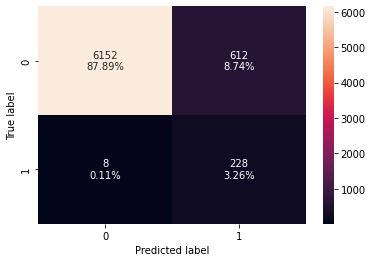

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.91143,0.96610,0.27143,0.42379


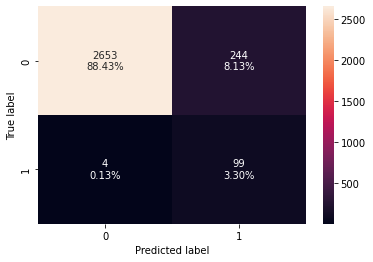

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.91733,0.96117,0.28863,0.44395


* En el árbol pospodado también, el modelo está dando un resultado generalizado ya que las puntuaciones de recuperación tanto en los datos de entrenamiento como en los datos de prueba están llegando a ser de alrededor de 0,96, lo que demuestra que el modelo es capaz de generalizar bien en datos no vistos.

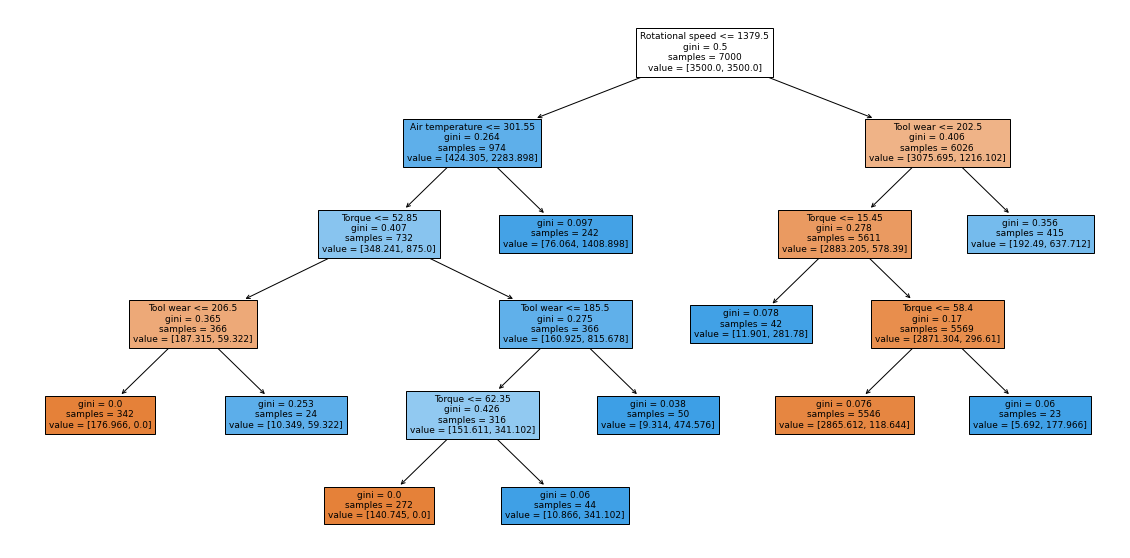

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- weights: [140.75, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- weights: [76.06, 1408.90] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 202.50
|   |   |--- Torque <= 15.45
|   |   |   |--- weights: [11.90, 281.78] class: 1
|   |   |--- Torque >  15.45
|   |   |   |--- Torque <= 58.40
|   |   |   |   |--- weights: [2865.61, 118.64] class: 0
|   |   |   |--- Torque >  58

- Podemos ver que la observación que obtuvimos del árbol prepodado también coincide con las reglas del árbol de decisión del árbol pospodado.

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

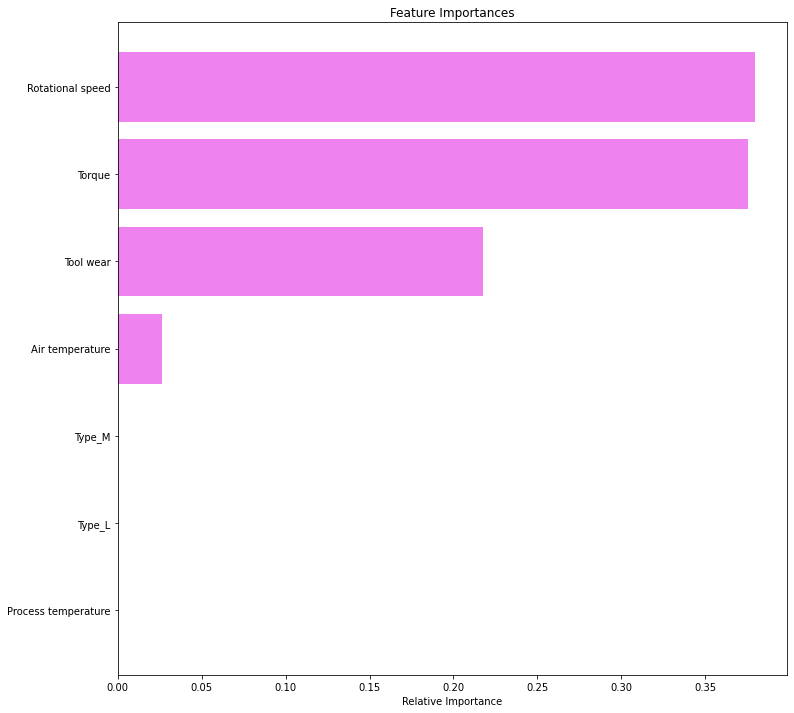

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- La *velocidad de rotación* y *la torsión* son las características más importantes para el árbol post podado.

## Comparación de modelos y selección del modelo final

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.87343,0.91143
Recall,1.00000,1.00000,0.96610,0.96610
Precision,1.00000,1.00000,0.20615,0.27143
F1,1.00000,1.00000,0.33979,0.42379


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97567,0.97700,0.88167,0.91733
Recall,0.72816,0.61165,0.96117,0.96117
Precision,0.62500,0.68478,0.22000,0.28863
F1,0.67265,0.64615,0.35805,0.44395


* Los modelos de árboles de decisión con pre-poda y post-poda están dando puntajes de recuperación igualmente altos tanto en conjuntos de entrenamiento como de prueba.
* Sin embargo, elegiremos el árbol pospodado como el mejor modelo, ya que está dando una puntuación de precisión ligeramente más alta en los conjuntos de entrenamiento y prueba que el árbol pre podado.

## Conclusiones y Recomendaciones

- El modelo construido se puede utilizar para predecir si una máquina va a fallar o no y puede identificar correctamente el 96,1% de las fallas de la máquina.

- La velocidad de rotación, la torsión y el desgaste de la herramienta son las variables más importantes para predecir si una máquina fallará o no.

- Del árbol de decisión se ha observado que si la velocidad de rotación es menor o igual a 1379.50, la temperatura del aire es menor o igual a 301.55, el torque es menor o igual a 52.85 y el desgaste de la herramienta es mayor a 206.50, entonces es más probable que la máquina falle
  - La empresa debe estar atenta a estos valores para detectar fallas en la máquina.


- La empresa debe usar más datos para el análisis para obtener resultados más confiables


- Como la variable utilizada varía según el tipo de operación (torneado, taladrado, etc.) que se realiza, la empresa puede buscar construir modelos separados para cada tipo de operación

## <a name='link1'>Apéndice: Análisis detallado de datos exploratorios (EDA)</a>

### Análisis univariado

#### Observación de la temperatura del aire

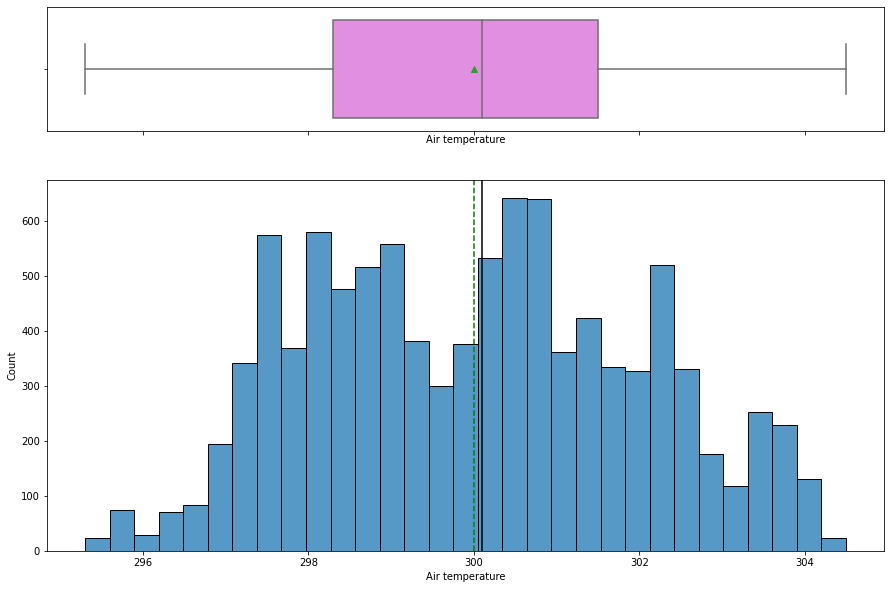

In [ ]:
histogram_boxplot(data, "Air temperature")

* La distribución de la *temperatura del aire* parece ligeramente sesgada a la izquierda con una temperatura media de alrededor de 300K.
* No hay ningún valor atípico presente.

#### Observación de la temperatura del proceso

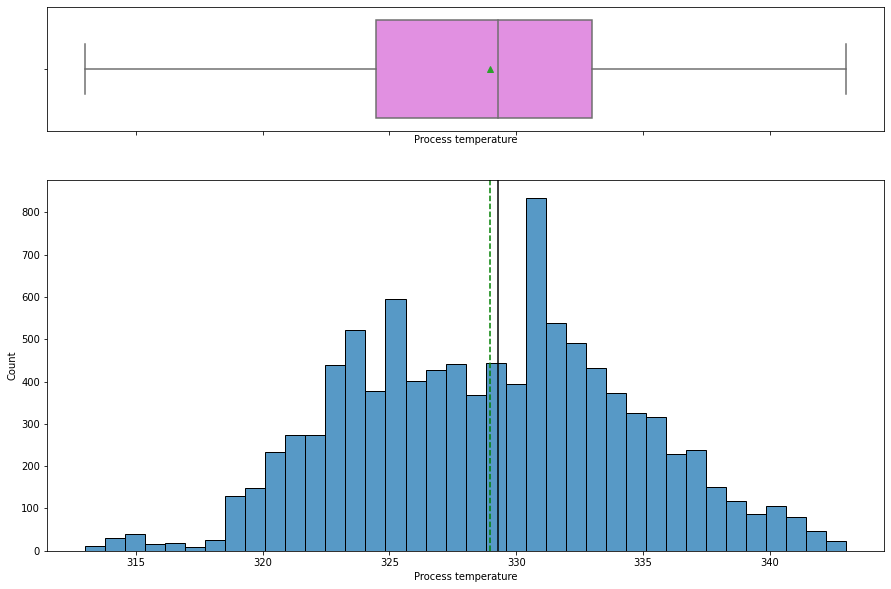

In [ ]:
histogram_boxplot(data, "Process temperature")

* La distribución de la *temperatura del proceso* parece ligeramente sesgada hacia la izquierda con un valor medio de alrededor de 329K.
* No hay ningún valor atípico presente.

#### Observación de la velocidad de rotación

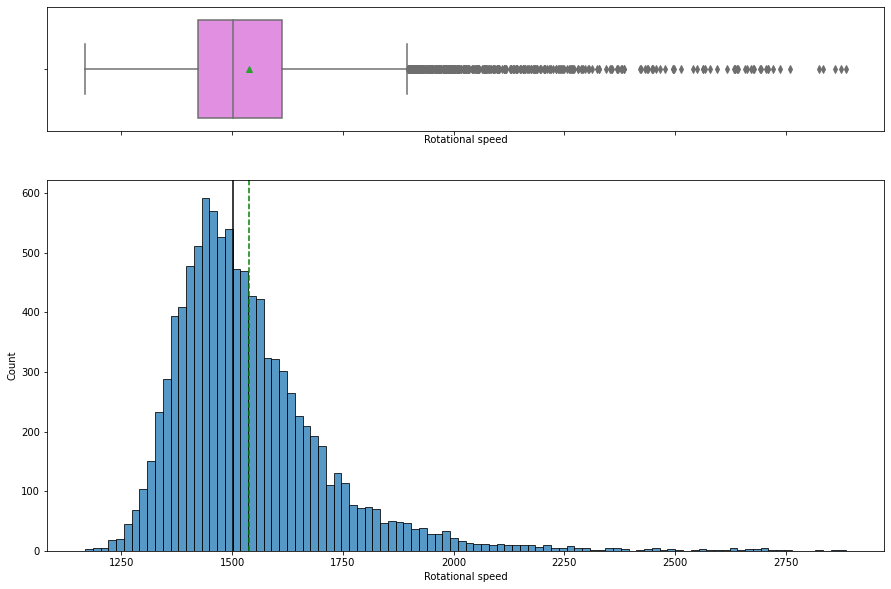

In [ ]:
histogram_boxplot(data, "Rotational speed")

* La *velocidad de rotación* está sesgada a la derecha con muchos valores atípicos en el cuartil superior.
* Algunas de las operaciones de fabricación se realizan a mayor velocidad.

#### Observación sobre la  torsión

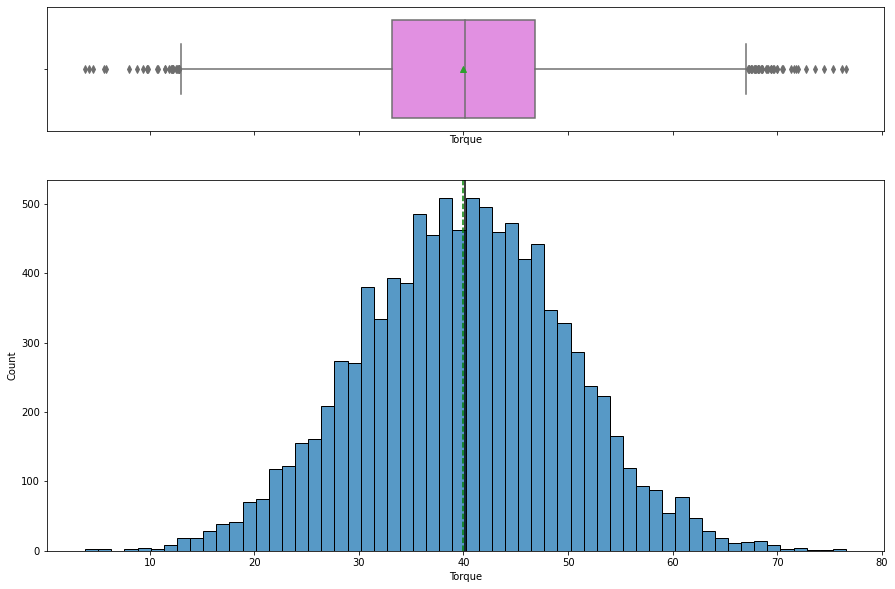

In [ ]:
histogram_boxplot(data, "Torque")

* La distribución de la torsión es normal con un valor medio de alrededor de 40 Nm.
* Los valores atípicos están presentes en ambos lados.

#### Observación sobre desgaste de herramientas

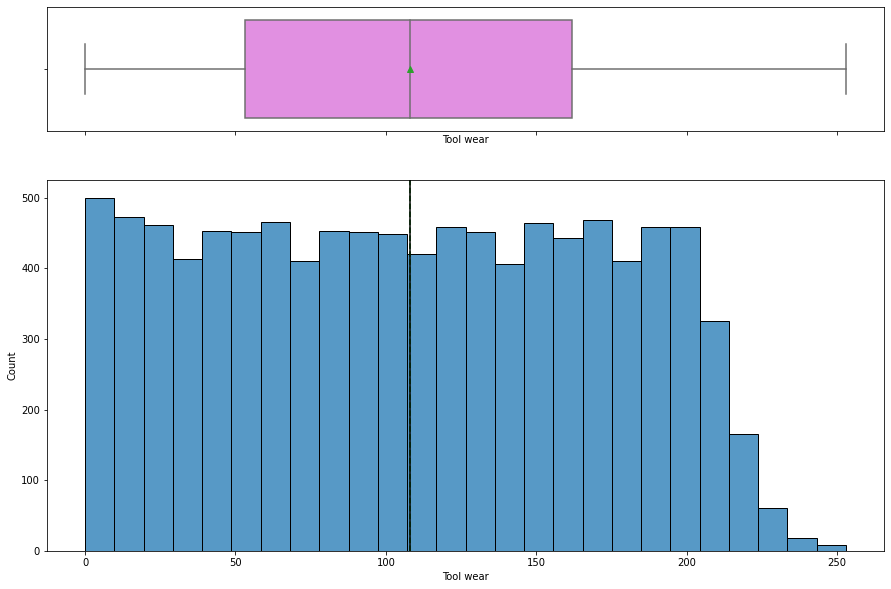

In [ ]:
histogram_boxplot(data, "Tool wear")

* El *desgaste de la herramienta* se distribuye uniformemente y algunos de los valores más altos son menos frecuentes.

#### Observación sobre Tipo de producto

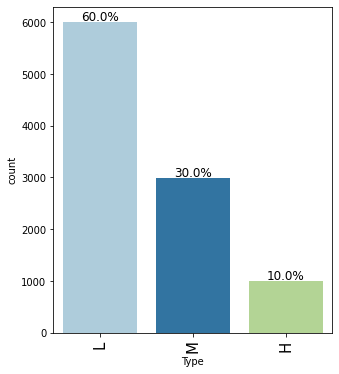

In [ ]:
labeled_barplot(data, "Type", perc=True)

* Alrededor del 60 % de los productos son de baja calidad, el 30 % son de calidad media y el 10 % son de alta calidad.

#### Observación sobre las fallas

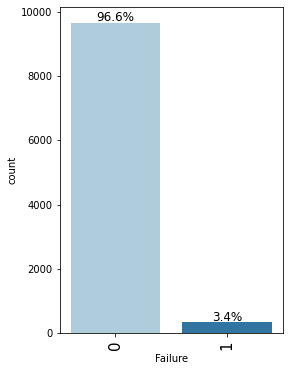

In [ ]:
labeled_barplot(data, "Failure", perc=True)

* En el 96,6% de las observaciones la máquina no falla mientras que en el 3,4% de las observaciones falla.

### Análisis bivariado

#### Comprobación de correlación

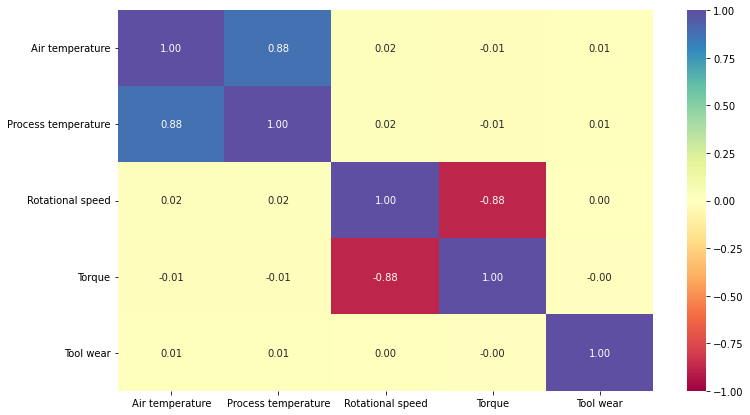

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Existe una correlación positiva entre la temperatura del aire y la temperatura del proceso.
* Existe una correlación negativa entre la velocidad de rotación y torsión.
* No hay otras variables correlacionadas. Lo analizaremos más a fondo.

#### Observación sobre Tipo vs Temperatura del aire

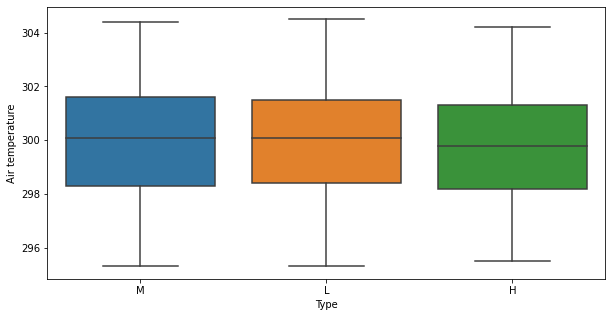

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Air temperature")
plt.show()

* No hay una diferencia clara en los valores de Temperatura del aire y Tipo

#### Observación sobre Tipo vs Temperatura de proceso

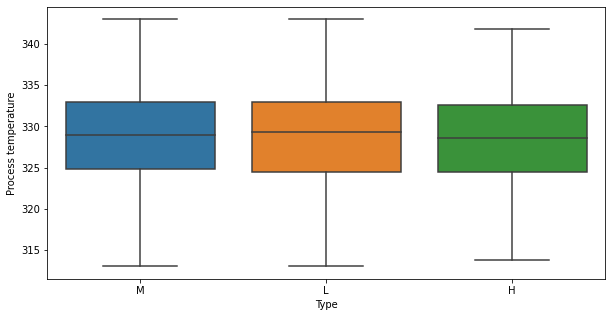

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Process temperature")
plt.show()

* No hay una diferencia clara en los valores de Temperatura de proceso y Tipo para los tipos M y L.
* Se observa una 'temperatura de proceso' menor en la fabricación de productos de tipo H.

#### Observación sobre Tipo vs Velocidad de rotación

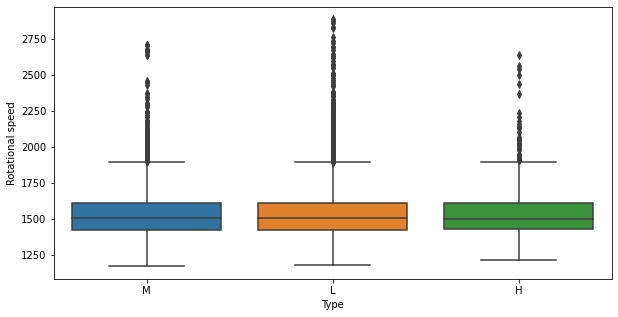

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Rotational speed")
plt.show()

* Algunos de los productos tipo L se fabrican a una velocidad de rotación más alta

#### Observación sobre Tipo vs Desgaste de herramienta

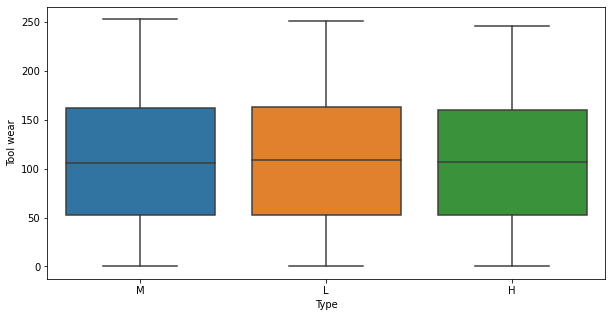

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Tool wear")
plt.show()

* No hay una diferencia clara en los valores de 'Desgaste de la herramienta' y 'Tipo'

#### Observación sobre Tipo vs Torsión

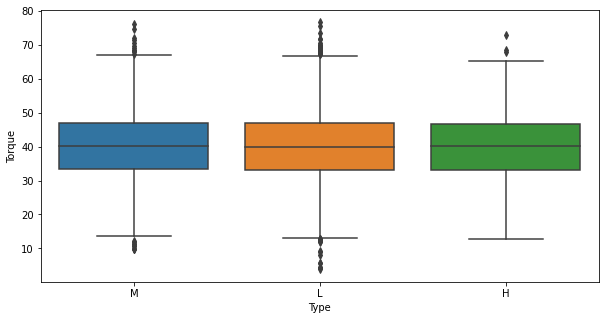

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Torque")
plt.show()

* Algunos de los productos de tipo L se fabrican con un "Toque" más bajo en comparación con los productos de tipo M y H.

#### Falla vs Tipo

**Veamos cómo varía la variable objetivo según el tipo de producto**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


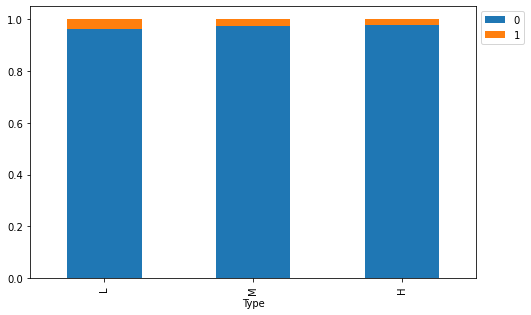

In [ ]:
stacked_barplot(data, "Type", "Failure")

* Alrededor del 70 % de las fallas ocurrieron durante el mecanizado de tipo L, es decir, productos de baja calidad.
* El mecanizado de productos de alta calidad es menos propenso a fallar.

#### Distribución de variables numéricas de entrada por estado de falla

**Analicemos la relación entre Temperatura del aire y Fallo.**

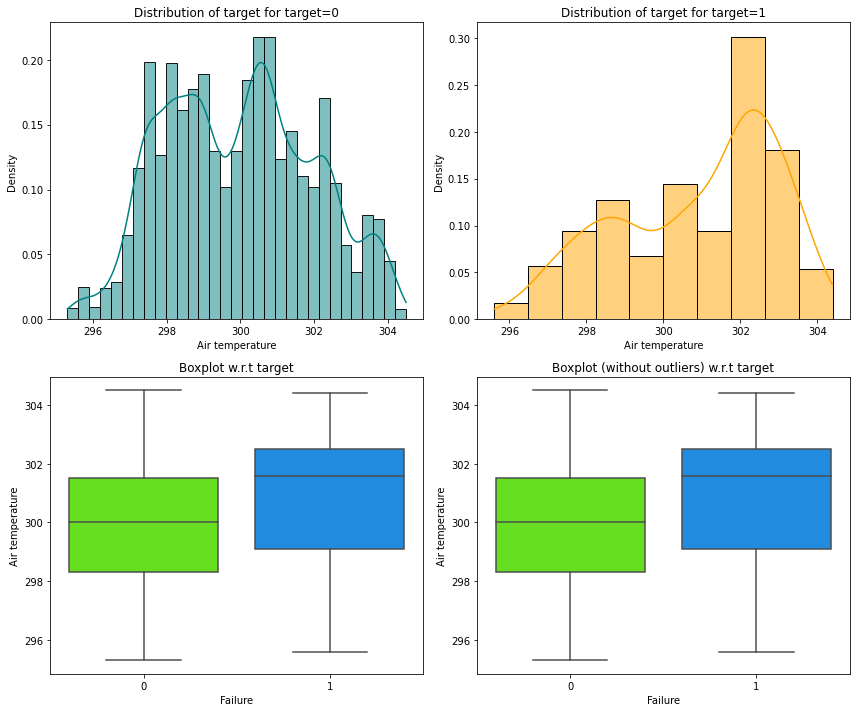

In [ ]:
distribution_plot_wrt_target(data, "Air temperature", "Failure")

* La mayoría de los fallos del sistema de fabricación se producen a mayor `Temperatura del aire`.

**Analicemos la relación entre Temperatura de proceso y Fallo.**

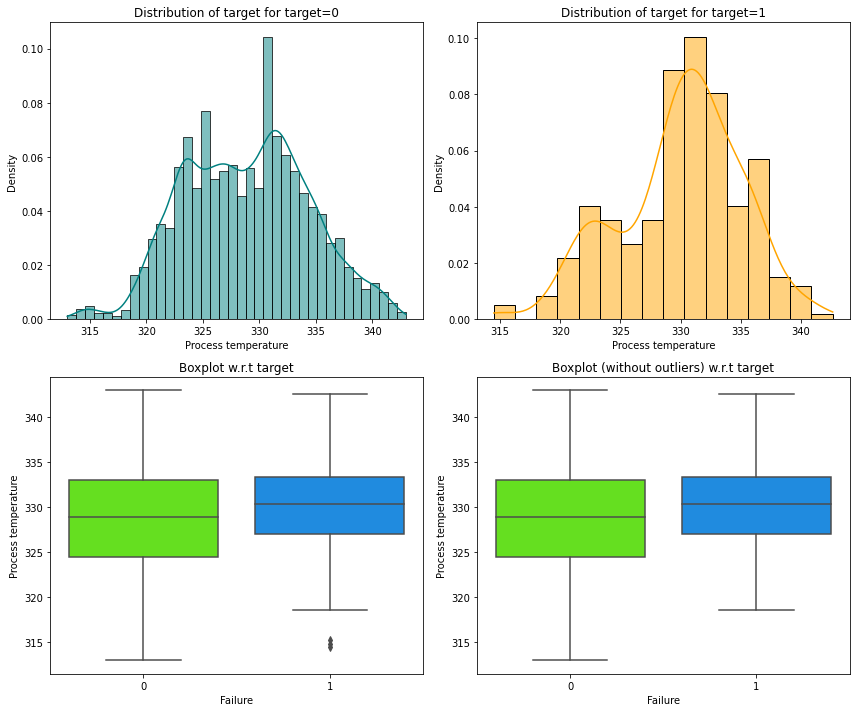

In [ ]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* La mayoría de las fallas del sistema de fabricación ocurren a una *temperatura de proceso* más alta.

**Analicemos la relación entre Velocidad de rotación y Fallo.**

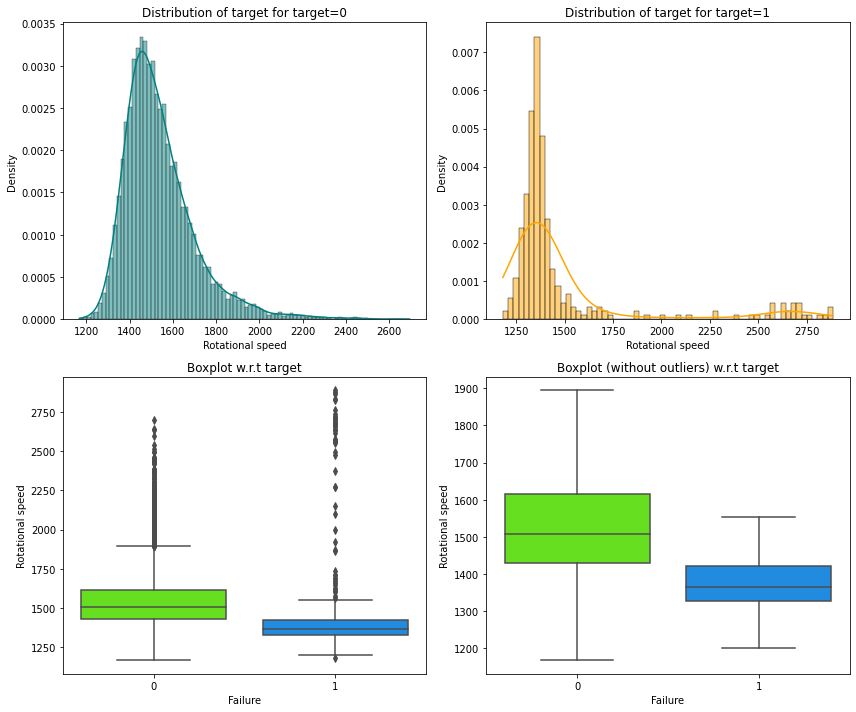

In [ ]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* El sistema de fabricación es más propenso a fallar a una *velocidad de rotación* más baja que a una velocidad de rotación más alta.

**Analicemos la relación entre Torsión y Fallo.**

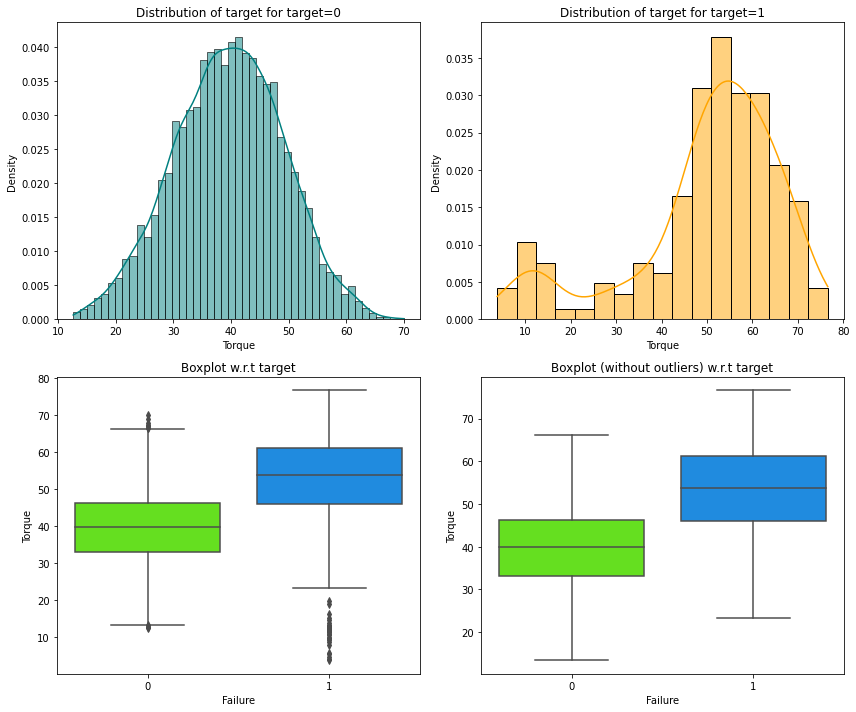

In [ ]:
distribution_plot_wrt_target(data, "Torque", "Failure")

* La mayoría de las fallas del sistema de fabricación ocurren con un par más alto en comparación con valores más bajos de par.

**Analicemos la relación entre Desgaste de la herramienta y Fallo**

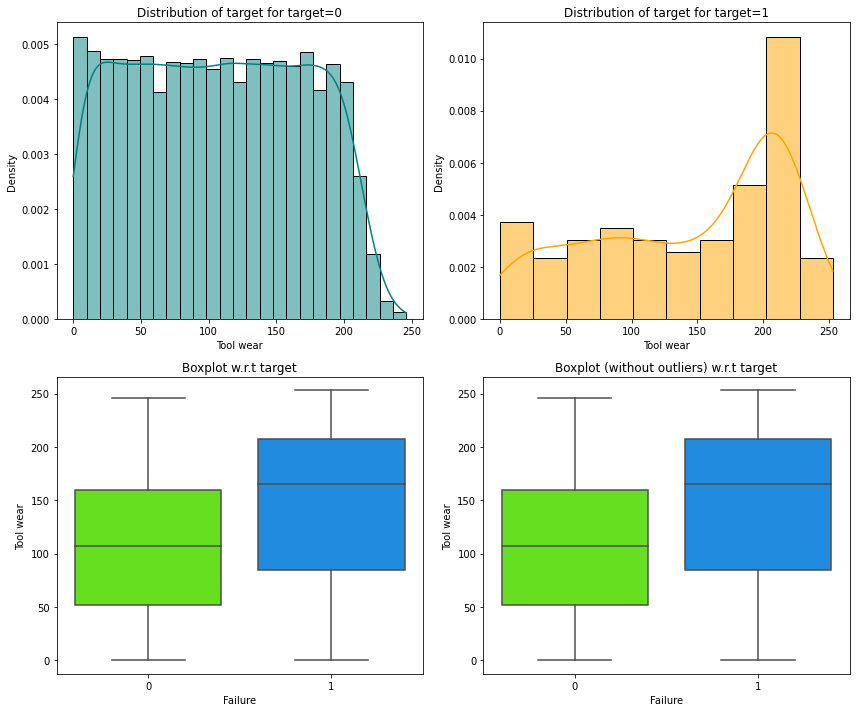

In [ ]:
distribution_plot_wrt_target(data, "Tool wear", "Failure")

* La mayoría de las fallas ocurren con valores más altos de desgaste de la herramienta que con un desgaste de la herramienta más bajo.

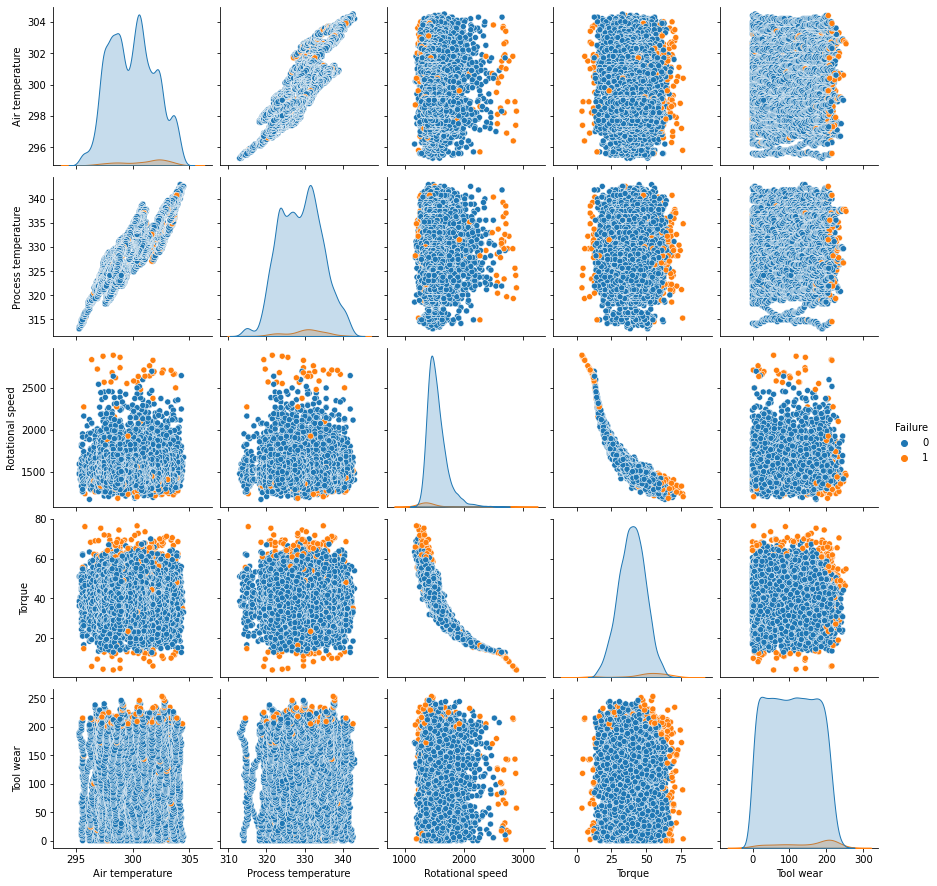

In [ ]:
sns.pairplot(data, hue="Failure")

- La correlación entre la temperatura del aire y la temperatura del proceso y torsión y la velocidad de rotación también es visible aquí

### Para volver a la sección de resumen de EDA, haga clic en <a href = #link2>aquí</a>.

___